In [2]:
pip install opencv-python scikit-learn matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


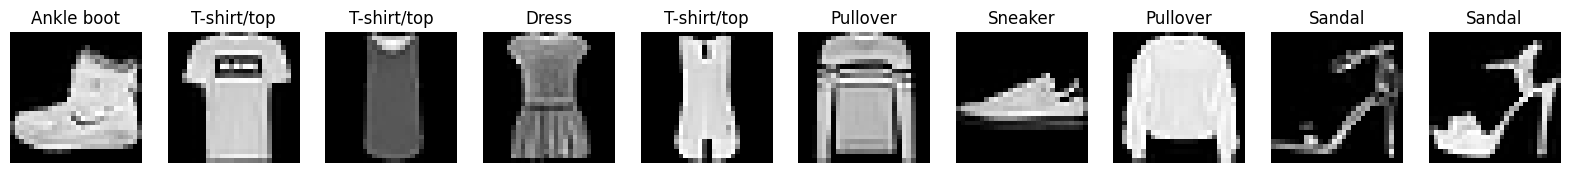

In [4]:
import matplotlib.pyplot as plt
def plot_initial_images(images, labels, class_names):
    fig, axes = plt.subplots(1, 10, figsize=(20, 3))
    for i in range(10):
        ax = axes[i]
        ax.imshow(images[i], cmap='gray')
        ax.set_title(class_names[labels[i]])
        ax.axis('off')
    plt.show()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_initial_images(X_train, y_train, class_names)

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(f"Processed training data shape: {X_train.shape}")
print(f"Processed testing data shape: {X_test.shape}")

Processed training data shape: (60000, 28, 28, 1)
Processed testing data shape: (10000, 28, 28, 1)


In [6]:
from skimage.feature import hog
import numpy as np
def extract_hog_features(images):
    hog_features = []
    for image in images:
        if image.ndim == 3:
            image = image.squeeze()
        features = hog(image,
                       pixels_per_cell=(4, 4),
                       cells_per_block=(2, 2),
                       visualize=False,
                       channel_axis=None)
        hog_features.append(features)
    return np.array(hog_features)
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)
print(f"HOG features training data shape: {X_train_hog.shape}")
print(f"HOG features testing data shape: {X_test_hog.shape}")

HOG features training data shape: (60000, 1296)
HOG features testing data shape: (10000, 1296)


In [7]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train_hog, y_train)
train_accuracy = svm.score(X_train_hog, y_train)
print(f"Training accuracy: {train_accuracy * 100:.2f}%")

Training accuracy: 93.34%


In [8]:
test_accuracy = svm.score(X_test_hog, y_test)
print(f"Testing accuracy: {test_accuracy * 100:.2f}%")

Testing accuracy: 88.84%


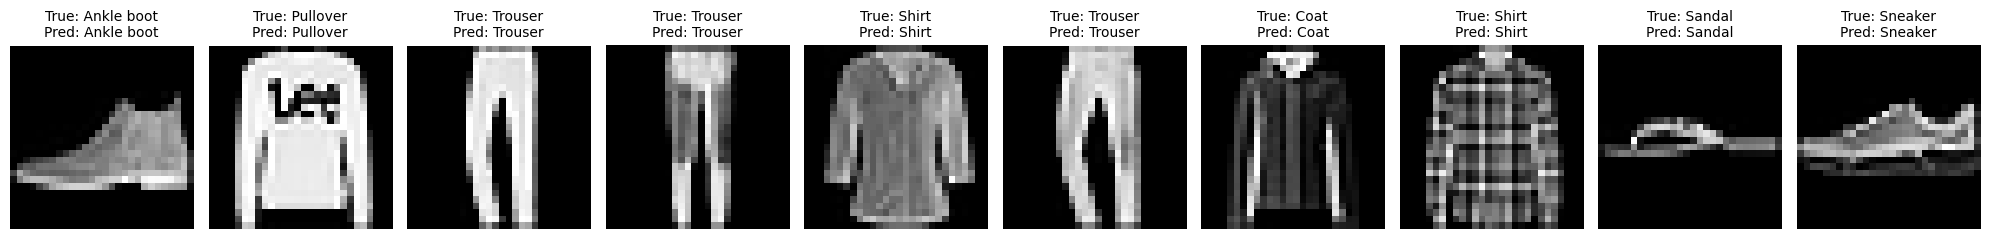

In [9]:
y_pred = svm.predict(X_test_hog)
def plot_output_images(images, true_labels, predicted_labels, class_names):
    fig, axes = plt.subplots(1, 10, figsize=(20, 3))
    for i in range(10):
        ax = axes[i]
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}", fontsize=10)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plot_output_images(X_test[:10], y_test[:10], y_pred[:10], class_names)